In [1]:
from load_data import MyOwnDataset
import torch
import torch.nn as nn
from torch.nn import Linear, ConvTranspose2d, MSELoss, CrossEntropyLoss
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool, GAE
from torch_geometric.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import image
import cv2
import os

In [2]:
print("Loading data....")
dataset = MyOwnDataset(root = "data/POLY/")
train_dataset = dataset[:4500]
test_dataset = dataset[4500:5000]
image_train_dataset = []
image_test_dataset = []
for i in range (4500):
    image = cv2.imread('data/images/image_%d.png'%i)
    image = torch.tensor(image)
    image = image[:,:,1]//255
    image = image.type(torch.float32)
    print("%d/4500" %i)
    image_train_dataset.append(image)
for i in range (4500,5000):
    image = cv2.imread('data/images/image_%d.png'%i)
    image = torch.tensor(image)
    image = image[:,:,1]//255
    image = image.type(torch.float32)
    print("%d/500" %(i-4500))
    image_test_dataset.append(image)


print("Training dataset length: ", len(train_dataset), "\nTesting dataset length: ", len(test_dataset))
print("Training images loaded:", len(image_train_dataset), "\nTesting images loaded:", len(image_test_dataset))
print()

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
train_images_loader = torch.utils.data.DataLoader(
    image_train_dataset, batch_size = 64
    )
test_images_loader = torch.utils.data.DataLoader(
    image_test_dataset, batch_size = 64
    )
print(f'Number of training batches created: {len(train_loader)}')
print()


Loading data....
0/4500
1/4500
2/4500
3/4500
4/4500
5/4500
6/4500
7/4500
8/4500
9/4500
10/4500
11/4500
12/4500
13/4500
14/4500
15/4500
16/4500
17/4500
18/4500
19/4500
20/4500
21/4500
22/4500
23/4500
24/4500
25/4500
26/4500
27/4500
28/4500
29/4500
30/4500
31/4500
32/4500
33/4500
34/4500
35/4500
36/4500
37/4500
38/4500
39/4500
40/4500
41/4500
42/4500
43/4500
44/4500
45/4500
46/4500
47/4500
48/4500
49/4500
50/4500
51/4500
52/4500
53/4500
54/4500
55/4500
56/4500
57/4500
58/4500
59/4500
60/4500
61/4500
62/4500
63/4500
64/4500
65/4500
66/4500
67/4500
68/4500
69/4500
70/4500
71/4500
72/4500
73/4500
74/4500
75/4500
76/4500
77/4500
78/4500
79/4500
80/4500
81/4500
82/4500
83/4500
84/4500
85/4500
86/4500
87/4500
88/4500
89/4500
90/4500
91/4500
92/4500
93/4500
94/4500
95/4500
96/4500
97/4500
98/4500
99/4500
100/4500
101/4500
102/4500
103/4500
104/4500
105/4500
106/4500
107/4500
108/4500
109/4500
110/4500
111/4500
112/4500
113/4500
114/4500
115/4500
116/4500
117/4500
118/4500
119/4500
120/4500
121/

1027/4500
1028/4500
1029/4500
1030/4500
1031/4500
1032/4500
1033/4500
1034/4500
1035/4500
1036/4500
1037/4500
1038/4500
1039/4500
1040/4500
1041/4500
1042/4500
1043/4500
1044/4500
1045/4500
1046/4500
1047/4500
1048/4500
1049/4500
1050/4500
1051/4500
1052/4500
1053/4500
1054/4500
1055/4500
1056/4500
1057/4500
1058/4500
1059/4500
1060/4500
1061/4500
1062/4500
1063/4500
1064/4500
1065/4500
1066/4500
1067/4500
1068/4500
1069/4500
1070/4500
1071/4500
1072/4500
1073/4500
1074/4500
1075/4500
1076/4500
1077/4500
1078/4500
1079/4500
1080/4500
1081/4500
1082/4500
1083/4500
1084/4500
1085/4500
1086/4500
1087/4500
1088/4500
1089/4500
1090/4500
1091/4500
1092/4500
1093/4500
1094/4500
1095/4500
1096/4500
1097/4500
1098/4500
1099/4500
1100/4500
1101/4500
1102/4500
1103/4500
1104/4500
1105/4500
1106/4500
1107/4500
1108/4500
1109/4500
1110/4500
1111/4500
1112/4500
1113/4500
1114/4500
1115/4500
1116/4500
1117/4500
1118/4500
1119/4500
1120/4500
1121/4500
1122/4500
1123/4500
1124/4500
1125/4500
1126/4500


1855/4500
1856/4500
1857/4500
1858/4500
1859/4500
1860/4500
1861/4500
1862/4500
1863/4500
1864/4500
1865/4500
1866/4500
1867/4500
1868/4500
1869/4500
1870/4500
1871/4500
1872/4500
1873/4500
1874/4500
1875/4500
1876/4500
1877/4500
1878/4500
1879/4500
1880/4500
1881/4500
1882/4500
1883/4500
1884/4500
1885/4500
1886/4500
1887/4500
1888/4500
1889/4500
1890/4500
1891/4500
1892/4500
1893/4500
1894/4500
1895/4500
1896/4500
1897/4500
1898/4500
1899/4500
1900/4500
1901/4500
1902/4500
1903/4500
1904/4500
1905/4500
1906/4500
1907/4500
1908/4500
1909/4500
1910/4500
1911/4500
1912/4500
1913/4500
1914/4500
1915/4500
1916/4500
1917/4500
1918/4500
1919/4500
1920/4500
1921/4500
1922/4500
1923/4500
1924/4500
1925/4500
1926/4500
1927/4500
1928/4500
1929/4500
1930/4500
1931/4500
1932/4500
1933/4500
1934/4500
1935/4500
1936/4500
1937/4500
1938/4500
1939/4500
1940/4500
1941/4500
1942/4500
1943/4500
1944/4500
1945/4500
1946/4500
1947/4500
1948/4500
1949/4500
1950/4500
1951/4500
1952/4500
1953/4500
1954/4500


3034/4500
3035/4500
3036/4500
3037/4500
3038/4500
3039/4500
3040/4500
3041/4500
3042/4500
3043/4500
3044/4500
3045/4500
3046/4500
3047/4500
3048/4500
3049/4500
3050/4500
3051/4500
3052/4500
3053/4500
3054/4500
3055/4500
3056/4500
3057/4500
3058/4500
3059/4500
3060/4500
3061/4500
3062/4500
3063/4500
3064/4500
3065/4500
3066/4500
3067/4500
3068/4500
3069/4500
3070/4500
3071/4500
3072/4500
3073/4500
3074/4500
3075/4500
3076/4500
3077/4500
3078/4500
3079/4500
3080/4500
3081/4500
3082/4500
3083/4500
3084/4500
3085/4500
3086/4500
3087/4500
3088/4500
3089/4500
3090/4500
3091/4500
3092/4500
3093/4500
3094/4500
3095/4500
3096/4500
3097/4500
3098/4500
3099/4500
3100/4500
3101/4500
3102/4500
3103/4500
3104/4500
3105/4500
3106/4500
3107/4500
3108/4500
3109/4500
3110/4500
3111/4500
3112/4500
3113/4500
3114/4500
3115/4500
3116/4500
3117/4500
3118/4500
3119/4500
3120/4500
3121/4500
3122/4500
3123/4500
3124/4500
3125/4500
3126/4500
3127/4500
3128/4500
3129/4500
3130/4500
3131/4500
3132/4500
3133/4500


4205/4500
4206/4500
4207/4500
4208/4500
4209/4500
4210/4500
4211/4500
4212/4500
4213/4500
4214/4500
4215/4500
4216/4500
4217/4500
4218/4500
4219/4500
4220/4500
4221/4500
4222/4500
4223/4500
4224/4500
4225/4500
4226/4500
4227/4500
4228/4500
4229/4500
4230/4500
4231/4500
4232/4500
4233/4500
4234/4500
4235/4500
4236/4500
4237/4500
4238/4500
4239/4500
4240/4500
4241/4500
4242/4500
4243/4500
4244/4500
4245/4500
4246/4500
4247/4500
4248/4500
4249/4500
4250/4500
4251/4500
4252/4500
4253/4500
4254/4500
4255/4500
4256/4500
4257/4500
4258/4500
4259/4500
4260/4500
4261/4500
4262/4500
4263/4500
4264/4500
4265/4500
4266/4500
4267/4500
4268/4500
4269/4500
4270/4500
4271/4500
4272/4500
4273/4500
4274/4500
4275/4500
4276/4500
4277/4500
4278/4500
4279/4500
4280/4500
4281/4500
4282/4500
4283/4500
4284/4500
4285/4500
4286/4500
4287/4500
4288/4500
4289/4500
4290/4500
4291/4500
4292/4500
4293/4500
4294/4500
4295/4500
4296/4500
4297/4500
4298/4500
4299/4500
4300/4500
4301/4500
4302/4500
4303/4500
4304/4500


In [3]:
class UnFlatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), 40, 6, 6)

class Encoder(torch.nn.Module):
    def __init__(self,hidden_channels):
        super(Encoder, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 32)
        self.conv3 = GCNConv(32, 64)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = global_mean_pool(x, batch)
        # x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(x)

        return x


class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.up = nn.Sequential(
            nn.Linear(64, 128, bias = True),
            nn.ReLU(True),
            nn.Linear(128, 256, bias = True),
            nn.ReLU(True),
            nn.Linear(256, 512, bias = True),
            nn.ReLU(True),
            nn.Linear(512, 1440, bias = True),
            nn.ReLU(True),
            UnFlatten(),
            nn.ConvTranspose2d(40,40,kernel_size=(4,4),stride = (2,2), bias = True),
            nn.ReLU(True),
            nn.ConvTranspose2d(40,20,kernel_size = (5,5), stride = (2,2), bias = True),
            nn.ReLU(True),
            nn.ConvTranspose2d(20,1,kernel_size = (4,4), stride = (2,2), bias = True)
            )
    def forward(self, output):
        res = self.up(output)
        res = res.squeeze()
        return res

class Classifier(torch.nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.lin1 = Linear(64, 128)
        self.lin2 = Linear(128, 20)
        self.lin3 = Linear(20, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)
        x = self.lin3(x)

        return x

print("Printing Encoder/Decoder Model:")
autoenencoder = GAE(Encoder(hidden_channels=32), Decoder())
classifier = Classifier()
print(autoenencoder)
print(classifier)

Printing Encoder/Decoder Model:
GAE(
  (encoder): Encoder(
    (conv1): GCNConv(2, 32)
    (conv2): GCNConv(32, 32)
    (conv3): GCNConv(32, 64)
  )
  (decoder): Decoder(
    (up): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=128, out_features=256, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=256, out_features=512, bias=True)
      (5): ReLU(inplace=True)
      (6): Linear(in_features=512, out_features=1440, bias=True)
      (7): ReLU(inplace=True)
      (8): UnFlatten()
      (9): ConvTranspose2d(40, 40, kernel_size=(4, 4), stride=(2, 2))
      (10): ReLU(inplace=True)
      (11): ConvTranspose2d(40, 20, kernel_size=(5, 5), stride=(2, 2))
      (12): ReLU(inplace=True)
      (13): ConvTranspose2d(20, 1, kernel_size=(4, 4), stride=(2, 2))
    )
  )
)
Classifier(
  (lin1): Linear(in_features=64, out_features=128, bias=True)
  (lin2): Linear(in_features=128, out_features=20

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
autoenencoder = autoenencoder.to(device)
classifier = classifier.to(device)
optimizer = torch.optim.Adam(autoenencoder.parameters(), lr=0.001)
AEcriterion = MSELoss()
optimizer2 = torch.optim.Adam(classifier.parameters(), lr=0.001)
CLScriterion = CrossEntropyLoss()

def train():
    autoenencoder.train()
    classifier.train()
    for data, image in zip(train_loader, train_images_loader):
        encoded = autoenencoder.encode(data.x, data.edge_index, data.batch)
        recons = autoenencoder.decode(encoded)
        classified = classifier(encoded)

        AELoss = AEcriterion(recons, image)
        CLSLoss = CLScriterion(classified, data.y)
        loss = (0.6*AELoss + 0.4*CLSLoss)
        optimizer.zero_grad()
        optimizer2.zero_grad()
        loss.backward()
        optimizer.step()
        optimizer2.step()

    return loss

def test():
    autoenencoder.eval()
    classifier.eval()
    
    for data, image in zip(test_loader, test_images_loader):
        encoded = autoenencoder.encode(data.x, data.edge_index, data.batch)
        recons = autoenencoder.decode(encoded)
        classified = classifier(encoded)

        AEtest_loss = AEcriterion(recons, image)
        CLStest_loss = CLScriterion(classified, data.y)
        
        
        test_loss = (0.6*AEtest_loss + 0.4*CLStest_loss)

    return test_loss, AEtest_loss, CLStest_loss

train_loss = []
test_loss = []
AE_loss = []
CLS_loss = []

for epoch in range(1, 200):
    loss = 0
    loss=train()
    testloss, AEloss, CLSloss = test()
    train_loss.append(loss)
    test_loss.append(testloss)
    AE_loss.append(AEloss)
    CLS_loss.append(CLSloss)
    # test_loss.append(testloss)
    # if epoch%10 == 0:
    #     torch.save(model.encoder, 'model.pt')

    print(f'Epoch: {epoch:03d}, Train loss: {loss}, Test loss: {testloss}, AE Loss: {AEloss}, CLS Loss: {CLSloss}')

Epoch: 001, Train loss: 0.4464581608772278, Test loss: 0.4492228925228119, AE Loss: 0.08714734017848969, CLS Loss: 0.6906065344810486
Epoch: 002, Train loss: 0.40681394934654236, Test loss: 0.4072107672691345, AE Loss: 0.08065637201070786, CLS Loss: 0.6249136328697205
Epoch: 003, Train loss: 0.2285444736480713, Test loss: 0.20560017228126526, AE Loss: 0.056347623467445374, CLS Loss: 0.3051018714904785
Epoch: 004, Train loss: 0.16971074044704437, Test loss: 0.17305953800678253, AE Loss: 0.04627684876322746, CLS Loss: 0.25758132338523865
Epoch: 005, Train loss: 0.16455727815628052, Test loss: 0.1702134907245636, AE Loss: 0.042388916015625, CLS Loss: 0.25542986392974854
Epoch: 006, Train loss: 0.15396970510482788, Test loss: 0.16404707729816437, AE Loss: 0.03555099293589592, CLS Loss: 0.24971112608909607
Epoch: 007, Train loss: 0.14569897949695587, Test loss: 0.1535203754901886, AE Loss: 0.032449204474687576, CLS Loss: 0.23423448204994202
Epoch: 008, Train loss: 0.14313672482967377, Test 

Epoch: 061, Train loss: 0.09704205393791199, Test loss: 0.11257202178239822, AE Loss: 0.021601585671305656, CLS Loss: 0.1732189804315567
Epoch: 062, Train loss: 0.09816339612007141, Test loss: 0.11241964995861053, AE Loss: 0.02082405611872673, CLS Loss: 0.17348337173461914
Epoch: 063, Train loss: 0.09883829206228256, Test loss: 0.11109880357980728, AE Loss: 0.017436526715755463, CLS Loss: 0.17354032397270203
Epoch: 064, Train loss: 0.10099917650222778, Test loss: 0.11041957885026932, AE Loss: 0.017201310023665428, CLS Loss: 0.17256508767604828
Epoch: 065, Train loss: 0.09881244599819183, Test loss: 0.11129890382289886, AE Loss: 0.01899593137204647, CLS Loss: 0.17283421754837036
Epoch: 066, Train loss: 0.09755661338567734, Test loss: 0.11082059144973755, AE Loss: 0.019698845222592354, CLS Loss: 0.17156840860843658
Epoch: 067, Train loss: 0.09814678132534027, Test loss: 0.1104777455329895, AE Loss: 0.018321063369512558, CLS Loss: 0.17191551625728607
Epoch: 068, Train loss: 0.097767442464

Epoch: 121, Train loss: 0.07480420172214508, Test loss: 0.10650128871202469, AE Loss: 0.015958813950419426, CLS Loss: 0.16686293482780457
Epoch: 122, Train loss: 0.07328060269355774, Test loss: 0.105409175157547, AE Loss: 0.015808675438165665, CLS Loss: 0.16514283418655396
Epoch: 123, Train loss: 0.07484244555234909, Test loss: 0.10492641478776932, AE Loss: 0.01631039008498192, CLS Loss: 0.16400375962257385
Epoch: 124, Train loss: 0.07408158481121063, Test loss: 0.10571170598268509, AE Loss: 0.01778433658182621, CLS Loss: 0.16432994604110718
Epoch: 125, Train loss: 0.07388690859079361, Test loss: 0.10573077201843262, AE Loss: 0.01909741200506687, CLS Loss: 0.16348634660243988
Epoch: 126, Train loss: 0.07325047254562378, Test loss: 0.10740181058645248, AE Loss: 0.0216202512383461, CLS Loss: 0.1645895093679428
Epoch: 127, Train loss: 0.07120537012815475, Test loss: 0.10905040055513382, AE Loss: 0.023969870060682297, CLS Loss: 0.1657707393169403
Epoch: 128, Train loss: 0.0689607635140419,

Epoch: 181, Train loss: 0.027583779767155647, Test loss: 0.07871214300394058, AE Loss: 0.017242370173335075, CLS Loss: 0.11969198286533356
Epoch: 182, Train loss: 0.028286544606089592, Test loss: 0.07958944141864777, AE Loss: 0.01697462424635887, CLS Loss: 0.12133265286684036
Epoch: 183, Train loss: 0.02704998478293419, Test loss: 0.07485304027795792, AE Loss: 0.017371419817209244, CLS Loss: 0.11317411810159683
Epoch: 184, Train loss: 0.023808205500245094, Test loss: 0.07377560436725616, AE Loss: 0.01748063415288925, CLS Loss: 0.11130557954311371
Epoch: 185, Train loss: 0.023984499275684357, Test loss: 0.07485993951559067, AE Loss: 0.01805422641336918, CLS Loss: 0.11273041367530823
Epoch: 186, Train loss: 0.02211419865489006, Test loss: 0.07098063081502914, AE Loss: 0.017289279028773308, CLS Loss: 0.10677485913038254
Epoch: 187, Train loss: 0.022457674145698547, Test loss: 0.07382714748382568, AE Loss: 0.017494745552539825, CLS Loss: 0.11138208210468292
Epoch: 188, Train loss: 0.022463

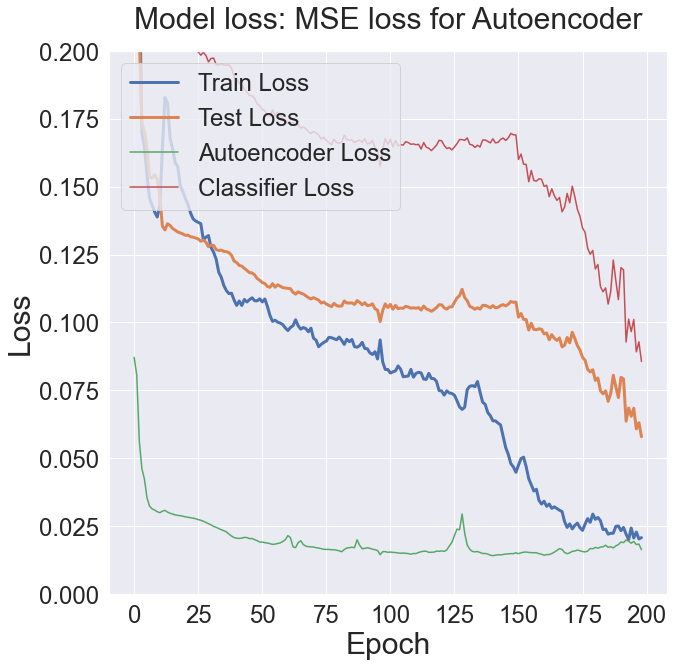

In [15]:
plt.figure(figsize=(10,10))
plt.plot(train_loss, linewidth=3.0)
plt.plot(test_loss, linewidth=3.0)
plt.plot(AE_loss)
plt.plot(CLS_loss)
plt.title('Model loss: MSE loss for Autoencoder',fontsize=30,y=1.03)
plt.ylim(0,0.2)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylabel('Loss',fontsize=30)
plt.xlabel('Epoch',fontsize=30)
plt.legend(['Train Loss', 'Test Loss', 'Autoencoder Loss', 'Classifier Loss'], loc='upper left',fontsize=24)
plt.savefig('Loss_plot')

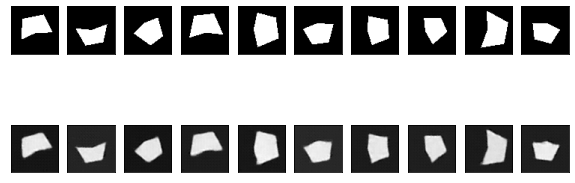

In [7]:
import torch
with torch.no_grad():
    for data in test_loader:
        encoded = autoenencoder.encode(data.x, data.edge_index, data.batch)
        reconstruction = autoenencoder.decode(encoded)
        break
with torch.no_grad():
    for batch_images in test_images_loader:
        batch_images = batch_images
        break

with torch.no_grad():
    number = 10
    plt.figure(figsize=(10, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(batch_images[index].numpy().reshape(64, 64))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, number, index + 1 + number)
        plt.imshow(reconstruction[index].numpy().reshape(64, 64))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [8]:
print(f'Number of training batches created: {len(train_loader)}')

def test(loader):
    classifier.eval()
    correct = 0
    for data in loader:
        out = autoenencoder.encoder(data.x, data.edge_index, data.batch)
        out = classifier(out)
        pred = out.argmax(dim=1)
        correct+= int((pred == data.y).sum())
    return correct/len(loader.dataset)


test_acc = test(test_loader)
print(f'Test acc: {test_acc:.4f}')

Number of training batches created: 71
Test acc: 0.9720


In [9]:
import numpy
y_true = []
y_pred = []

def test(loader):
    classifier.eval()
    correct = 0
    for data in loader:
        out = autoenencoder.encoder(data.x, data.edge_index, data.batch)
        out = classifier(out)
        pred = out.argmax(dim=1)
        correct+= int((pred == data.y).sum())
        y_true.append(data.y.numpy())
        y_pred.append(pred.numpy())        
    return correct/len(loader.dataset)


test_acc = test(test_loader)
print(f'Test acc: {test_acc:.4f}')
# y_pred = y_pred[1].numpy()
# y_true = y_true[1].numpy()
y_pred = numpy.concatenate((y_pred[0],y_pred[1], y_pred[2], y_pred[3], y_pred[4], y_pred[5], y_pred[6],y_pred[7]))
y_true = numpy.concatenate((y_true[0],y_true[1], y_true[2], y_true[3], y_true[4], y_true[5], y_true[6],y_true[7]))
print(y_pred)
print(y_true)

Test acc: 0.9720
[1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1
 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1
 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0
 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1
 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0
 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0
 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1
 0 0 0 1

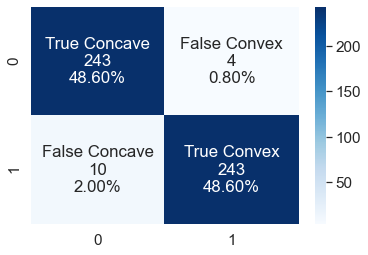

In [10]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_true, y_pred)

# df_cm = pd.DataFrame(array, range(2), range(2))
# # plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
# # sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size


group_names = ['True Concave','False Convex','False Concave','True Convex']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.show()